# CS444 Assignment 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from kaggle_submission import output_submission_csv
from models.neural_net import NeuralNetwork
from utils.data_process import get_FASHION_data

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Loading Fashion-MNIST
Now that you have implemented a neural network that passes gradient checks and works on toy data, you will test your network on the Fashion-MNIST dataset.

In [2]:
# You can change these numbers for experimentation
# For submission be sure they are set to the default values
TRAIN_IMAGES = 50000
VAL_IMAGES = 10000
TEST_IMAGES = 10000

data = get_FASHION_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

## Train using SGD
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

You can try different numbers of layers and other hyperparameters on the Fashion-MNIST dataset below.

In [19]:
##SGD 2 layers 
# Hyperparameters
input_size = 28 * 28
num_layers = 2
hidden_size = 80
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 200
batch_size = 400
lr = 1e-3
learning_rate_decay = 0.95
regularization = 0.1
b1=0.9
b2=0.999
eps= 1e-8
t=1

# Initialize a new neural network model
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers,eps, b1, b2, t)

# Variables to store performance for each epoch
train_loss = np.zeros(epochs)
train_accuracy = np.zeros(epochs)
val_accuracy = np.zeros(epochs)

    
# For each epoch...
for epoch in range(epochs):
    #print('epoch:', epoch)
    
    # Create Minibatches
    no_minibatch = TRAIN_IMAGES // batch_size
    random_perm = np.random.permutation(TRAIN_IMAGES)
    batches = random_perm[:no_minibatch*batch_size].reshape((no_minibatch,batch_size))
    
    # Training
    # For each mini-batch...
    for batch_no in range (no_minibatch): #(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
        X_mb = X_train[batches[batch_no]] #minibatch data, size (N,D), N = batch_size
        y_mb = y_train[batches[batch_no]] #Size (N,)
        
        # Run the forward pass of the model to get a prediction and compute the accuracy
        Z = net.forward(X_mb)
        pred = np.argmax(Z,axis=1) # Prediction by the network
        accuracy = np.sum(y_mb==pred)/batch_size
        train_accuracy[epoch] += accuracy

        # Run the backward pass of the model to compute the loss, and update the weights
        train_loss[epoch] += net.backward(y_mb, regularization)
        net.update(lr)
        
    train_loss[epoch] = train_loss[epoch]/no_minibatch
    train_accuracy[epoch] = train_accuracy[epoch]/no_minibatch

    # Validation
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    val_accuracy[epoch] += net.get_accuracy(X_val, y_val)
    print("Loss:", train_loss[epoch], "|| Training Accuracy: ", train_accuracy[epoch], "||  Validation Acc: ", val_accuracy[epoch])
    

Loss: 11.586945886936952 || Training Accuracy:  0.7311800000000002 ||  Validation Acc:  0.775
Loss: 6.939860616290341 || Training Accuracy:  0.80216 ||  Validation Acc:  0.7792
Loss: 5.978932991227504 || Training Accuracy:  0.8172800000000002 ||  Validation Acc:  0.8
Loss: 5.367639276403623 || Training Accuracy:  0.8290199999999998 ||  Validation Acc:  0.8175
Loss: 4.9430523935594 || Training Accuracy:  0.8356999999999996 ||  Validation Acc:  0.8196
Loss: 4.60810753251635 || Training Accuracy:  0.8427399999999997 ||  Validation Acc:  0.8148
Loss: 4.350401491509464 || Training Accuracy:  0.8483999999999996 ||  Validation Acc:  0.8213
Loss: 4.140242934905025 || Training Accuracy:  0.8529400000000001 ||  Validation Acc:  0.8246
Loss: 3.9754854302594462 || Training Accuracy:  0.8569399999999998 ||  Validation Acc:  0.8241
Loss: 3.8118587248541935 || Training Accuracy:  0.8604800000000005 ||  Validation Acc:  0.8279
Loss: 3.669063951451265 || Training Accuracy:  0.8642599999999998 ||  Valid

Loss: 0.650155517323615 || Training Accuracy:  0.9402999999999998 ||  Validation Acc:  0.8802
Loss: 0.6405584733665316 || Training Accuracy:  0.9403599999999998 ||  Validation Acc:  0.8815
Loss: 0.6300314960695513 || Training Accuracy:  0.9403599999999999 ||  Validation Acc:  0.8821
Loss: 0.6197759544042671 || Training Accuracy:  0.9410000000000005 ||  Validation Acc:  0.8793
Loss: 0.6095804652494227 || Training Accuracy:  0.9411 ||  Validation Acc:  0.8822
Loss: 0.6002269191423847 || Training Accuracy:  0.9410799999999998 ||  Validation Acc:  0.88
Loss: 0.5914792436795239 || Training Accuracy:  0.9423400000000002 ||  Validation Acc:  0.8803
Loss: 0.5821162801467672 || Training Accuracy:  0.9418999999999996 ||  Validation Acc:  0.8832
Loss: 0.5736139856703742 || Training Accuracy:  0.94206 ||  Validation Acc:  0.8835
Loss: 0.5657241008020856 || Training Accuracy:  0.9426000000000001 ||  Validation Acc:  0.8809
Loss: 0.5566842631162666 || Training Accuracy:  0.9432999999999998 ||  Valid

Loss: 0.2797242430212831 || Training Accuracy:  0.9594799999999996 ||  Validation Acc:  0.8881
Loss: 0.2785551902256715 || Training Accuracy:  0.9603200000000004 ||  Validation Acc:  0.8895
Loss: 0.2775020406912454 || Training Accuracy:  0.9593799999999999 ||  Validation Acc:  0.8886
Loss: 0.2770453416814901 || Training Accuracy:  0.9583599999999998 ||  Validation Acc:  0.8913
Loss: 0.27585250487381197 || Training Accuracy:  0.9598199999999999 ||  Validation Acc:  0.8895
Loss: 0.2747570465908155 || Training Accuracy:  0.9599599999999999 ||  Validation Acc:  0.8902
Loss: 0.2751142664351404 || Training Accuracy:  0.9581199999999994 ||  Validation Acc:  0.8872
Loss: 0.2722817669265743 || Training Accuracy:  0.9599800000000003 ||  Validation Acc:  0.8904
Loss: 0.2728256224835593 || Training Accuracy:  0.9597 ||  Validation Acc:  0.8913
Loss: 0.270020118368103 || Training Accuracy:  0.9600599999999997 ||  Validation Acc:  0.8907
Loss: 0.2698496998767947 || Training Accuracy:  0.959979999999

In [20]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

In [21]:
#SGD 2 Layer accuracy test
Z1 = net.forward(X_test)
pred1 = np.argmax(Z1,axis=1)
best_2layer_adam_prediction = pred1
test_acc_sgd_2layer= get_acc(pred1,y_test)

In [22]:
##SGD 3 layers 
# Hyperparameters
input_size = 28 * 28
num_layers = 3
hidden_size = 80
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 250
batch_size = 400
lr = 1e-3
learning_rate_decay = 0.95
regularization = 0.1
b1=0.9
b2=0.999
eps= 1e-8
t=1

# Initialize a new neural network model
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers,eps, b1, b2, t)

# Variables to store performance for each epoch
train_loss = np.zeros(epochs)
train_accuracy = np.zeros(epochs)
val_accuracy = np.zeros(epochs)

# For each epoch...
#for epoch in range(epochs):
   # print('epoch:', epoch)
    
# For each epoch...
for epoch in range(epochs):
    #print('epoch:', epoch)
    
    # Create Minibatches
    no_minibatch = TRAIN_IMAGES // batch_size
    random_perm = np.random.permutation(TRAIN_IMAGES)
    batches = random_perm[:no_minibatch*batch_size].reshape((no_minibatch,batch_size))
    
    # Training
    # For each mini-batch...
    for batch_no in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
        X_mb = X_train[batches[batch_no]] #minibatch data, size (N,D), N = batch_size
        y_mb = y_train[batches[batch_no]] #Size (N,)
        
        # Run the forward pass of the model to get a prediction and compute the accuracy
        Z = net.forward(X_mb)
        pred = np.argmax(Z,axis=1) # Prediction by the network
        accuracy = np.sum(y_mb==pred)/batch_size
        train_accuracy[epoch] += accuracy

        # Run the backward pass of the model to compute the loss, and update the weights
        train_loss[epoch] += net.backward(y_mb, regularization)
        net.update(lr)
        
    train_loss[epoch] = train_loss[epoch]/no_minibatch
    train_accuracy[epoch] = train_accuracy[epoch]/no_minibatch

    # Validation
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    val_accuracy[epoch] += net.get_accuracy(X_val, y_val)
    print("Loss:", train_loss[epoch], "|| Training Accuracy: ", train_accuracy[epoch], "||  Validation Acc: ", val_accuracy[epoch])
    

Loss: 12.669791343358302 || Training Accuracy:  0.69446 ||  Validation Acc:  0.7474
Loss: 9.733878907190418 || Training Accuracy:  0.7721399999999997 ||  Validation Acc:  0.7611
Loss: 9.02138973277561 || Training Accuracy:  0.7928999999999997 ||  Validation Acc:  0.7776
Loss: 8.54471453574037 || Training Accuracy:  0.8041000000000001 ||  Validation Acc:  0.7894
Loss: 8.172359570224156 || Training Accuracy:  0.8148999999999997 ||  Validation Acc:  0.7872
Loss: 7.863490577756401 || Training Accuracy:  0.8210200000000001 ||  Validation Acc:  0.7956
Loss: 7.591916914794104 || Training Accuracy:  0.82908 ||  Validation Acc:  0.8018
Loss: 7.34816875045077 || Training Accuracy:  0.8362600000000004 ||  Validation Acc:  0.8081
Loss: 7.122122531827619 || Training Accuracy:  0.8426400000000004 ||  Validation Acc:  0.8057
Loss: 6.916077073541552 || Training Accuracy:  0.8471800000000002 ||  Validation Acc:  0.8143
Loss: 6.722389074566626 || Training Accuracy:  0.8506800000000003 ||  Validation Acc

Loss: 1.2342686970388468 || Training Accuracy:  0.90808 ||  Validation Acc:  0.8794
Loss: 1.2142447011859736 || Training Accuracy:  0.9076399999999998 ||  Validation Acc:  0.8813
Loss: 1.1944596167606687 || Training Accuracy:  0.9080399999999998 ||  Validation Acc:  0.882
Loss: 1.175290325851655 || Training Accuracy:  0.9080399999999997 ||  Validation Acc:  0.8798
Loss: 1.1567270097973428 || Training Accuracy:  0.9087599999999995 ||  Validation Acc:  0.8812
Loss: 1.1385019108838945 || Training Accuracy:  0.9087599999999999 ||  Validation Acc:  0.8825
Loss: 1.1205495284415037 || Training Accuracy:  0.90856 ||  Validation Acc:  0.8806
Loss: 1.103115194752087 || Training Accuracy:  0.9090800000000001 ||  Validation Acc:  0.8804
Loss: 1.0862601383256694 || Training Accuracy:  0.9087799999999996 ||  Validation Acc:  0.8817
Loss: 1.069743444171304 || Training Accuracy:  0.9090400000000001 ||  Validation Acc:  0.8815
Loss: 1.05386666686055 || Training Accuracy:  0.9090000000000003 ||  Validat

Loss: 0.5013326999157968 || Training Accuracy:  0.9163600000000004 ||  Validation Acc:  0.8843
Loss: 0.49887103340195027 || Training Accuracy:  0.9167799999999999 ||  Validation Acc:  0.885
Loss: 0.49629382465525296 || Training Accuracy:  0.91684 ||  Validation Acc:  0.8858
Loss: 0.49414414648483307 || Training Accuracy:  0.9169999999999998 ||  Validation Acc:  0.8851
Loss: 0.4925473039675401 || Training Accuracy:  0.9171199999999997 ||  Validation Acc:  0.8865
Loss: 0.4900041486067942 || Training Accuracy:  0.9165199999999997 ||  Validation Acc:  0.885
Loss: 0.48790232554870794 || Training Accuracy:  0.9175000000000008 ||  Validation Acc:  0.8859
Loss: 0.4856591199467332 || Training Accuracy:  0.9175399999999995 ||  Validation Acc:  0.8865
Loss: 0.4838880383420305 || Training Accuracy:  0.9169 ||  Validation Acc:  0.8856
Loss: 0.4819668120508436 || Training Accuracy:  0.9168199999999999 ||  Validation Acc:  0.8841
Loss: 0.48017362965042293 || Training Accuracy:  0.9174599999999998 || 

In [23]:
#SGD 3 Layer accuracy test
Z2 = net.forward(X_test)
pred2 = np.argmax(Z2,axis=1)
test_acc_sgd_3layer= get_acc(pred2,y_test)

## Train using Adam
Next we will train the same model using the Adam optimizer. You should take the above code for SGD and modify it to use Adam instead. For implementation details, see the lecture slides. The original paper that introduced Adam is also a good reference, and contains suggestions for default values: https://arxiv.org/pdf/1412.6980.pdf

In [138]:
##Adam 2 layers
# Hyperparameters
input_size = 28 * 28
num_layers = 2
hidden_size = 220
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 200
batch_size = 400
lr = 1e-3
learning_rate_decay = 0.95
regularization = 0.1
b1=0.9
b2=0.999
eps= 1e-8
t=1

# Initialize a new neural network model
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers,eps, b1, b2, t , m_dw, m_db, v_dw, v_db)

# Variables to store performance for each epoch
train_loss1 = np.zeros(epochs)
train_accuracy1 = np.zeros(epochs)
val_accuracy1 = np.zeros(epochs)
#test_accuracy1=np.zeros(epochs)

# For each epoch...
#for epoch in range(epochs):
   # print('epoch:', epoch)
    
# For each epoch...
for epoch in range(epochs):
    #print('epoch:', epoch)
    
    # Create Minibatches
    no_minibatch = TRAIN_IMAGES // batch_size
    random_perm = np.random.permutation(TRAIN_IMAGES)
    batches = random_perm[:no_minibatch*batch_size].reshape((no_minibatch,batch_size))
    
    # Training
    # For each mini-batch...
    for batch_no in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
        X_mb1 = X_train[batches[batch_no]] #minibatch data, size (N,D), N = batch_size
        y_mb1 = y_train[batches[batch_no]] #Size (N,)
        
        # Run the forward pass of the model to get a prediction and compute the accuracy
        Z1 = net.forward(X_mb1)
        pred1 = np.argmax(Z1,axis=1) # Prediction by the network
        accuracy1 = np.sum(y_mb1==pred1)/batch_size
        train_accuracy1[epoch] += accuracy1
        

        # Run the backward pass of the model to compute the loss, and update the weights
        t+=1
        train_loss1[epoch] += net.backward(y_mb1, regularization)
        net.update_adam(lr,t)
        
    train_loss1[epoch] = train_loss1[epoch]/no_minibatch
    train_accuracy1[epoch] = train_accuracy1[epoch]/no_minibatch

    # Validation
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    val_accuracy1[epoch] += net.get_accuracy(X_val, y_val)
    print("Loss:", train_loss1[epoch], "|| Training Accuracy: ", train_accuracy1[epoch], "||  Validation Acc: ", val_accuracy1[epoch])
    


Loss: 19.263433616102375 || Training Accuracy:  0.7460000000000002 ||  Validation Acc:  0.7854
Loss: 14.024494810842207 || Training Accuracy:  0.8125199999999999 ||  Validation Acc:  0.8133
Loss: 12.833799650814806 || Training Accuracy:  0.8294200000000002 ||  Validation Acc:  0.8195
Loss: 12.056087297947876 || Training Accuracy:  0.8393000000000002 ||  Validation Acc:  0.8175
Loss: 11.442670881407464 || Training Accuracy:  0.84812 ||  Validation Acc:  0.8291
Loss: 10.961050412908861 || Training Accuracy:  0.8533799999999998 ||  Validation Acc:  0.8363
Loss: 10.534839036701582 || Training Accuracy:  0.8604200000000004 ||  Validation Acc:  0.824
Loss: 10.170467381766983 || Training Accuracy:  0.8637199999999999 ||  Validation Acc:  0.8316
Loss: 9.832539112566442 || Training Accuracy:  0.8673999999999998 ||  Validation Acc:  0.837
Loss: 9.523600743051144 || Training Accuracy:  0.8718599999999995 ||  Validation Acc:  0.8434
Loss: 9.191669043197885 || Training Accuracy:  0.8778000000000004

Loss: 1.3613976793294824 || Training Accuracy:  0.9652600000000002 ||  Validation Acc:  0.8838
Loss: 1.3325360003730444 || Training Accuracy:  0.9656199999999998 ||  Validation Acc:  0.8843
Loss: 1.30442729641964 || Training Accuracy:  0.9659399999999997 ||  Validation Acc:  0.883
Loss: 1.2764109507213004 || Training Accuracy:  0.9661800000000005 ||  Validation Acc:  0.8817
Loss: 1.2505769978432395 || Training Accuracy:  0.9666000000000002 ||  Validation Acc:  0.8808
Loss: 1.2237747932043983 || Training Accuracy:  0.96712 ||  Validation Acc:  0.8849
Loss: 1.1984989474175702 || Training Accuracy:  0.9676799999999998 ||  Validation Acc:  0.8825
Loss: 1.1742405604798987 || Training Accuracy:  0.9676199999999998 ||  Validation Acc:  0.8817
Loss: 1.149718106741006 || Training Accuracy:  0.9688999999999995 ||  Validation Acc:  0.8847
Loss: 1.1258111121157637 || Training Accuracy:  0.9687799999999996 ||  Validation Acc:  0.8835
Loss: 1.1036330833141474 || Training Accuracy:  0.968140000000000

Loss: 0.3449207488489837 || Training Accuracy:  0.9738000000000004 ||  Validation Acc:  0.8838
Loss: 0.34062705558737416 || Training Accuracy:  0.9750799999999998 ||  Validation Acc:  0.8922
Loss: 0.33869179695840385 || Training Accuracy:  0.9740199999999998 ||  Validation Acc:  0.8865
Loss: 0.3349148241513426 || Training Accuracy:  0.9751799999999997 ||  Validation Acc:  0.8917
Loss: 0.33297876890975747 || Training Accuracy:  0.9739399999999998 ||  Validation Acc:  0.8888
Loss: 0.32914856705702306 || Training Accuracy:  0.97536 ||  Validation Acc:  0.8806
Loss: 0.32551857947658147 || Training Accuracy:  0.9757200000000003 ||  Validation Acc:  0.8925
Loss: 0.32272605504951096 || Training Accuracy:  0.9756200000000002 ||  Validation Acc:  0.896
Loss: 0.32006464387071526 || Training Accuracy:  0.9756199999999996 ||  Validation Acc:  0.8959
Loss: 0.31845290331659976 || Training Accuracy:  0.9755000000000001 ||  Validation Acc:  0.8944
Loss: 0.3145063930729147 || Training Accuracy:  0.9753

In [139]:
#Adam 2 Layer accuracy test
Z3 = net.forward(X_test)
pred3 = np.argmax(Z3,axis=1)
test_acc_adam_2layer= get_acc(pred3,y_test)

In [133]:
##Adam 3 layers
# Hyperparameters
input_size = 28 * 28
num_layers = 3
hidden_size = 240
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 200
batch_size = 400
lr = 1e-3
learning_rate_decay = 0.95
regularization = 0.1
b1=0.9
b2=0.999
eps= 1e-8
t=1

# Initialize a new neural network model
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers,eps, b1, b2, t, m_dw, m_db, v_dw, v_db)

# Variables to store performance for each epoch
train_loss1 = np.zeros(epochs)
train_accuracy1 = np.zeros(epochs)
val_accuracy1 = np.zeros(epochs)
#test_accuracy1=np.zeros(epochs)

# For each epoch...
#for epoch in range(epochs):
   # print('epoch:', epoch)
    
# For each epoch...
for epoch in range(epochs):
    #print('epoch:', epoch)
    
    # Create Minibatches
    no_minibatch = TRAIN_IMAGES // batch_size
    random_perm = np.random.permutation(TRAIN_IMAGES)
    batches = random_perm[:no_minibatch*batch_size].reshape((no_minibatch,batch_size))
    
    # Training
    # For each mini-batch...
    for batch_no in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
        X_mb1 = X_train[batches[batch_no]] #minibatch data, size (N,D), N = batch_size
        y_mb1 = y_train[batches[batch_no]] #Size (N,)
        
        # Run the forward pass of the model to get a prediction and compute the accuracy
        Z1 = net.forward(X_mb1)
        pred1 = np.argmax(Z1,axis=1) # Prediction by the network
        accuracy1 = np.sum(y_mb1==pred1)/batch_size
        train_accuracy1[epoch] += accuracy1
        

        # Run the backward pass of the model to compute the loss, and update the weights
        t+=1
        train_loss1[epoch] += net.backward(y_mb1, regularization)
        net.update_adam(lr,t)
        
    train_loss1[epoch] = train_loss1[epoch]/no_minibatch
    train_accuracy1[epoch] = train_accuracy1[epoch]/no_minibatch

    # Validation
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    val_accuracy1[epoch] += net.get_accuracy(X_val, y_val)
    print("Loss:", train_loss1[epoch], "|| Training Accuracy: ", train_accuracy1[epoch], "||  Validation Acc: ", val_accuracy1[epoch])
    

Loss: 29.04204379054939 || Training Accuracy:  0.7313399999999997 ||  Validation Acc:  0.7835
Loss: 25.44857330261252 || Training Accuracy:  0.8018399999999998 ||  Validation Acc:  0.7861
Loss: 24.254621242729275 || Training Accuracy:  0.8227200000000002 ||  Validation Acc:  0.8052
Loss: 23.339266865966064 || Training Accuracy:  0.8344 ||  Validation Acc:  0.8143
Loss: 22.571447589342263 || Training Accuracy:  0.8436 ||  Validation Acc:  0.8202
Loss: 21.883711776174636 || Training Accuracy:  0.8512199999999998 ||  Validation Acc:  0.8204
Loss: 21.246675649680565 || Training Accuracy:  0.86016 ||  Validation Acc:  0.8243
Loss: 20.641391077846883 || Training Accuracy:  0.8675800000000001 ||  Validation Acc:  0.8273
Loss: 20.07591279705105 || Training Accuracy:  0.8737399999999995 ||  Validation Acc:  0.8286
Loss: 19.541254416108224 || Training Accuracy:  0.8794199999999999 ||  Validation Acc:  0.827
Loss: 19.0279843865936 || Training Accuracy:  0.8836800000000001 ||  Validation Acc:  0.8

Loss: 2.9331506918497063 || Training Accuracy:  0.9327200000000001 ||  Validation Acc:  0.884
Loss: 2.871310023537079 || Training Accuracy:  0.9330599999999998 ||  Validation Acc:  0.8851
Loss: 2.8111094126819154 || Training Accuracy:  0.9329800000000007 ||  Validation Acc:  0.8852
Loss: 2.751968307559264 || Training Accuracy:  0.9322999999999999 ||  Validation Acc:  0.8847
Loss: 2.6946470821648734 || Training Accuracy:  0.9322999999999998 ||  Validation Acc:  0.8847
Loss: 2.638653097886263 || Training Accuracy:  0.9318400000000003 ||  Validation Acc:  0.8851
Loss: 2.5840864168593622 || Training Accuracy:  0.9316399999999999 ||  Validation Acc:  0.8872
Loss: 2.5309513390417333 || Training Accuracy:  0.932 ||  Validation Acc:  0.8859
Loss: 2.4789620856081584 || Training Accuracy:  0.9318399999999998 ||  Validation Acc:  0.8842
Loss: 2.428326740452385 || Training Accuracy:  0.9308400000000003 ||  Validation Acc:  0.8861
Loss: 2.378947637706457 || Training Accuracy:  0.9314000000000001 ||

Loss: 0.68415007691557 || Training Accuracy:  0.9302000000000004 ||  Validation Acc:  0.8916
Loss: 0.6771384061120402 || Training Accuracy:  0.92978 ||  Validation Acc:  0.8911
Loss: 0.669819390086358 || Training Accuracy:  0.9303599999999999 ||  Validation Acc:  0.8908
Loss: 0.6633785711518355 || Training Accuracy:  0.9302600000000003 ||  Validation Acc:  0.892
Loss: 0.6567786311775489 || Training Accuracy:  0.9303199999999996 ||  Validation Acc:  0.8915
Loss: 0.6502577959199222 || Training Accuracy:  0.9303000000000007 ||  Validation Acc:  0.8908
Loss: 0.6440182752119122 || Training Accuracy:  0.9293799999999997 ||  Validation Acc:  0.8899
Loss: 0.6379053827037207 || Training Accuracy:  0.93098 ||  Validation Acc:  0.891
Loss: 0.6316263541951685 || Training Accuracy:  0.9314000000000001 ||  Validation Acc:  0.8914
Loss: 0.6261081490614032 || Training Accuracy:  0.9309000000000001 ||  Validation Acc:  0.8933
Loss: 0.6199200670397189 || Training Accuracy:  0.9308999999999997 ||  Valida

In [134]:
#Adam 3 Layer accuracy test
Z4 = net.forward(X_test)
pred4 = np.argmax(Z4,axis=1)
test_acc_adam_3layer= get_acc(pred4,y_test)

## Graph loss and train/val accuracies

Examining the loss graph along with the train and val accuracy graphs should help you gain some intuition for the hyperparameters you should try in the hyperparameter tuning below. It should also help with debugging any issues you might have with your network.

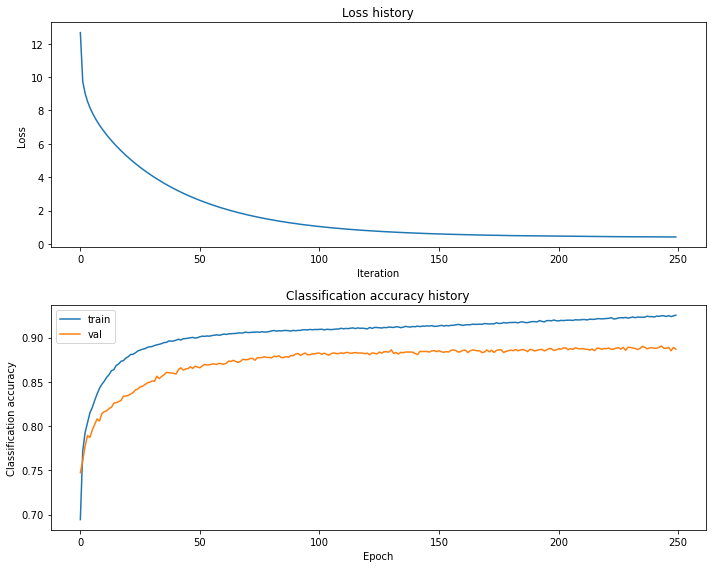

In [24]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_accuracy, label='train')
plt.plot(val_accuracy, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Hyperparameter tuning

Once you have successfully trained a network you can tune your hyparameters to increase your accuracy.

Based on the graphs of the loss function above you should be able to develop some intuition about what hyperparameter adjustments may be necessary. A very noisy loss implies that the learning rate might be too high, while a linearly decreasing loss would suggest that the learning rate may be too low. A large gap between training and validation accuracy would suggest overfitting due to a large model without much regularization. No gap between training and validation accuracy would indicate low model capacity. 

You will compare networks of two and three layers using the different optimization methods you implemented. 

The different hyperparameters you can experiment with are:
- **Batch size**: We recommend you leave this at 200 initially which is the batch size we used. 
- **Number of iterations**: You can gain an intuition for how many iterations to run by checking when the validation accuracy plateaus in your train/val accuracy graph.
- **Initialization** Weight initialization is very important for neural networks. We used the initialization `W = np.random.randn(n) / sqrt(n)` where `n` is the input dimension for layer corresponding to `W`. We recommend you stick with the given initializations, but you may explore modifying these. Typical initialization practices: http://cs231n.github.io/neural-networks-2/#init
- **Learning rate**: Generally from around 1e-4 to 1e-1 is a good range to explore according to our implementation.
- **Learning rate decay**: We recommend a 0.95 decay to start.
- **Hidden layer size**: You should explore up to around 120 units per layer. For three-layer network, we fixed the two hidden layers to be the same size when obtaining the target numbers. However, you may experiment with having different size hidden layers.
- **Regularization coefficient**: We recommend trying values in the range 0 to 0.1. 

Hints:
- After getting a sense of the parameters by trying a few values yourself, you will likely want to write a few for-loops to traverse over a set of hyperparameters.
- If you find that your train loss is decreasing, but your train and val accuracy start to decrease rather than increase, your model likely started minimizing the regularization term. To prevent this you will need to decrease the regularization coefficient. 

## Run on the test set
When you are done experimenting, you should evaluate your final trained networks on the test set.

In [140]:
#2 layer sgd accuracy 
print("Two layer sgd test accuracy: ",test_acc_sgd_2layer )

#3 layer sgd accuracy 
print("Three layer sgd test accuracy: ",test_acc_sgd_3layer )

#2 layer adam accuracy 
print("Two layer Adam test accuracy: ",test_acc_adam_2layer )

#3 layer adam accuracy 
print("Three layer adam test accuracy: ",test_acc_adam_3layer )


Two layer sgd test accuracy:  88.36
Three layer sgd test accuracy:  88.01
Two layer Adam test accuracy:  87.56
Three layer adam test accuracy:  88.44


## Kaggle output

Once you are satisfied with your solution and test accuracy, output a file to submit your test set predictions to the Kaggle for Assignment 2 Neural Network. Use the following code to do so:

In [141]:
pred1 = best_2layer_sgd_prediction
pred2 = best_3layer_sgd_prediction
pred3 = best_2layer_adam_prediction
best_3layer_adam_prediction =pred4

output_submission_csv('./nn_2layer_sgd_submission.csv', best_2layer_sgd_prediction)
output_submission_csv('./nn_3layer_sgd_submission.csv', best_3layer_sgd_prediction)
output_submission_csv('./nn_2layer_adam_submission.csv', best_2layer_adam_prediction)
output_submission_csv('./nn_3layer_adam_submission.csv', best_3layer_adam_prediction)

## Compare SGD and Adam
Create graphs to compare training loss and validation accuracy between SGD and Adam. The code is similar to the above code, but instead of comparing train and validation, we are comparing SGD and Adam.

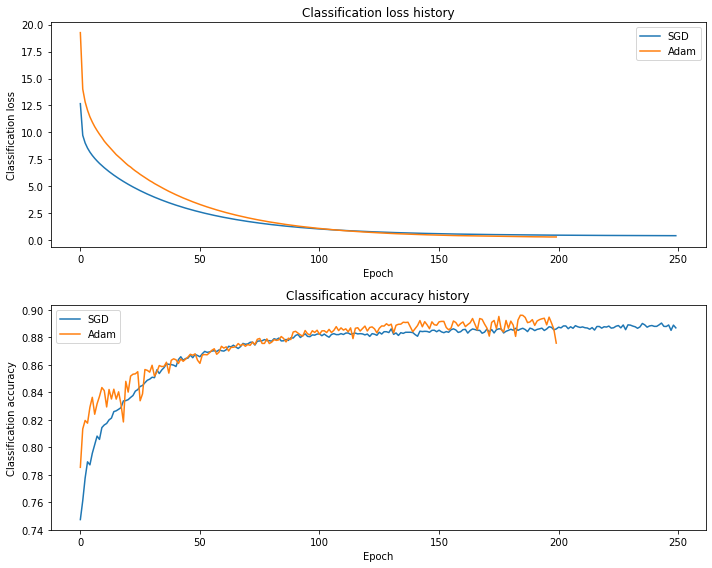

In [142]:
#Using SGD 3 layer and adam 3 layer 
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss, label='SGD')
plt.plot(train_loss1, label='Adam')
plt.title('Classification loss history')
plt.xlabel('Epoch')
plt.ylabel('Classification loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(val_accuracy, label='SGD')
plt.plot(val_accuracy1, label='Adam')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.tight_layout()
plt.show()